In [6]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

def forward_kinematics(q1, q2, q3, L1, L2, L3):
    """ -----------------------------------------------+
    Calcula las coordenadas de cada articulación y del efector final (x, y, z)
    de un brazo robótico de 3 DOF y devuelve las posiciones para su visualización.
    
    Parámetros:
    q1, q2, q3 : Ángulos articulares en grados.
    L1, L2, L3 : Longitudes de los eslabones.

    Retorna:
    positions : Lista de tuplas con las coordenadas de las articulaciones y el efector final.
    """
    # Convertir ángulos de grados a radianes
    theta1 = math.radians(q1)
    theta2 = math.radians(q2)
    theta3 = math.radians(q3)
    
    # Posición de la base (origen)
    x0, y0, z0 = 0, 0, 0
    
    # Posición de la primera articulación
    x1, y1, z1 = 0, 0, L1

    # Cálculos intermedios
    cos_theta1 = math.cos(theta1)
    sin_theta1 = math.sin(theta1)
    
    cos_theta2 = math.cos(theta2)
    sin_theta2 = math.sin(theta2)
    
    cos_theta23 = math.cos(theta2 + theta3)
    sin_theta23 = math.sin(theta2 + theta3)
    
    # Posición de la segunda articulación
    x2 = cos_theta1 * L2 * cos_theta2
    y2 = sin_theta1 * L2 * cos_theta2
    z2 = L1 + (L2 * sin_theta2)
    
    # Posición del efector final (tercera articulación)
    x3 = cos_theta1 * (L2 * cos_theta2 + L3 * cos_theta23)
    y3 = sin_theta1 * (L2 * cos_theta2 + L3 * cos_theta23)
    z3 = L1 + (L2 * sin_theta2) + (L3 * sin_theta23)
    
    # Lista de posiciones
    positions = [(x0, y0, z0), (x1, y1, z1), (x2, y2, z2), (x3, y3, z3)]
    
    return positions

In [7]:
def plot_robot(positions):
    """
    Dibuja el brazo robótico en un gráfico 3D utilizando las posiciones de las articulaciones.
    """
    # Separar las coordenadas para facilitar el plot
    x_coords, y_coords, z_coords = zip(*positions)
    
    # Configuración del gráfico 3D
    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Dibujar las líneas entre las articulaciones (eslabones)
    ax.plot(x_coords, y_coords, z_coords, '-o', markersize=8, linewidth=4, color='skyblue', label='Eslabones')
    
    # Dibujar las articulaciones
    ax.scatter(x_coords[:-1], y_coords[:-1], z_coords[:-1], color='navy', s=100, depthshade=True, label='Articulaciones')
    
    # Destacar el efector final
    ax.scatter(x_coords[-1], y_coords[-1], z_coords[-1], color='red', s=150, depthshade=True, label='Efector Final')
    
    # Etiquetas de las articulaciones
    articulations = ['Base', 'J1', 'J2', 'Efector']
    for i, (x, y, z) in enumerate(positions):
        ax.text(x, y, z + 0.5, articulations[i], fontsize=12, fontweight='bold', color='black')
    
    # Etiquetas de los ejes
    ax.set_xlabel('Eje X', fontsize=12, labelpad=10)
    ax.set_ylabel('Eje Y', fontsize=12, labelpad=10)
    ax.set_zlabel('Eje Z', fontsize=12, labelpad=10)
    ax.set_title('Visualización del Brazo Robótico 3D', fontsize=15, fontweight='bold', pad=20)
    
    # Configuración de la rejilla y fondo
    ax.grid(True)
    ax.set_facecolor('whitesmoke')
    
    # Ajustar la escala de los ejes
    max_range = max([
        max(x_coords) - min(x_coords),
        max(y_coords) - min(y_coords),
        max(z_coords) - min(z_coords)
    ])
    
    mid_x = (max(x_coords) + min(x_coords)) / 2
    mid_y = (max(y_coords) + min(y_coords)) / 2
    mid_z = (max(z_coords) + min(z_coords)) / 2
    ax.set_xlim(mid_x - max_range / 2, mid_x + max_range / 2)
    ax.set_ylim(mid_y - max_range / 2, mid_y + max_range / 2)
    ax.set_zlim(0, mid_z + max_range / 2)
    
    # Ángulo de vista inicial
    ax.view_init(elev=30, azim=60)
    
    # Añadir leyenda
    ax.legend(loc='upper left', fontsize=12)
    
    # Mostrar el gráfico
    plt.show()


Las porciciones de las articulaciones son: 
q1 = 30.00°, q2 = 30.00°, q3 = 30.00°
L1 = 10.00, L2 = 12.00, L3 = 23.00

Las coordenadas del efector final son:
x = 18.96
y = 10.95
z = 35.92


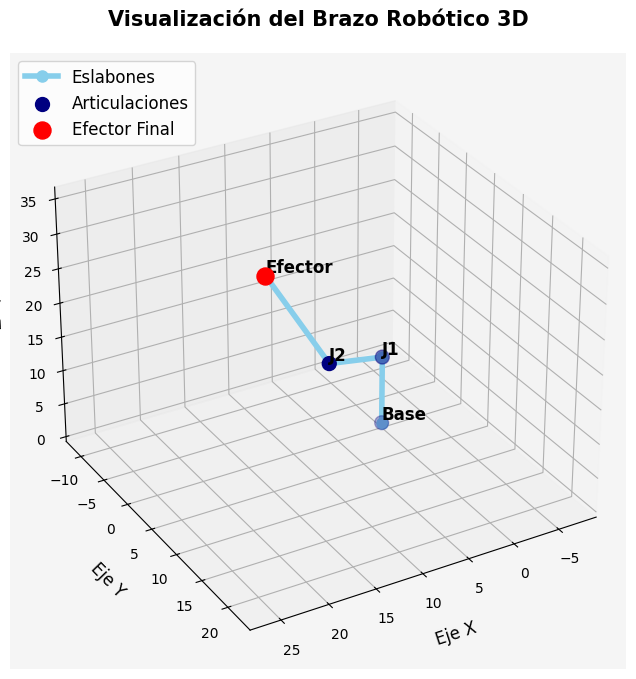

In [8]:
if __name__ == "__main__":
    import numpy as np

    # Ángulos articulares en grados
    q1 = float(input("Ingrese el valor de q1 (en grados): "))
    q2 = float(input("Ingrese el valor de q2 (en grados): "))
    q3 = float(input("Ingrese el valor de q3 (en grados): "))
    
    # Longitudes de los eslabones
    L1 = 10.0
    L2 = 12.0
    L3 = 23.0
    
    # Obtener las posiciones de las articulaciones
    positions = forward_kinematics(q1, q2, q3, L1, L2, L3)
    
    # Imprimir las coordenadas del efector final
    x_end, y_end, z_end = positions[-1]
    print("\nLas porciciones de las articulaciones son: ")
    print(f"q1 = {q1:.2f}°, q2 = {q2:.2f}°, q3 = {q3:.2f}°")
    print(f"L1 = {L1:.2f}, L2 = {L2:.2f}, L3 = {L3:.2f}")
    print(f"\nLas coordenadas del efector final son:")
    print(f"x = {x_end:.2f}")
    print(f"y = {y_end:.2f}")
    print(f"z = {z_end:.2f}")
    
    # Dibujar el brazo robótico
    plot_robot(positions)

Combinación 1: q1 = 38.05°, q2 = 3.74°, q3 = -3.98°
Posiciones: (27.542890576589155, 21.55429207911884, 10.683478457593457)


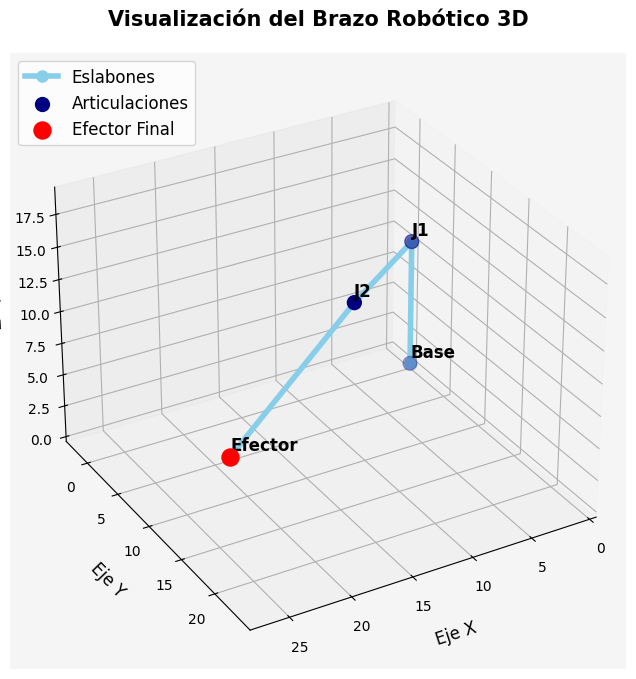

Combinación 2: q1 = -52.03°, q2 = -9.39°, q3 = 6.98°
Posiciones: (21.420686603203993, -27.450121738931124, 7.074633836751946)


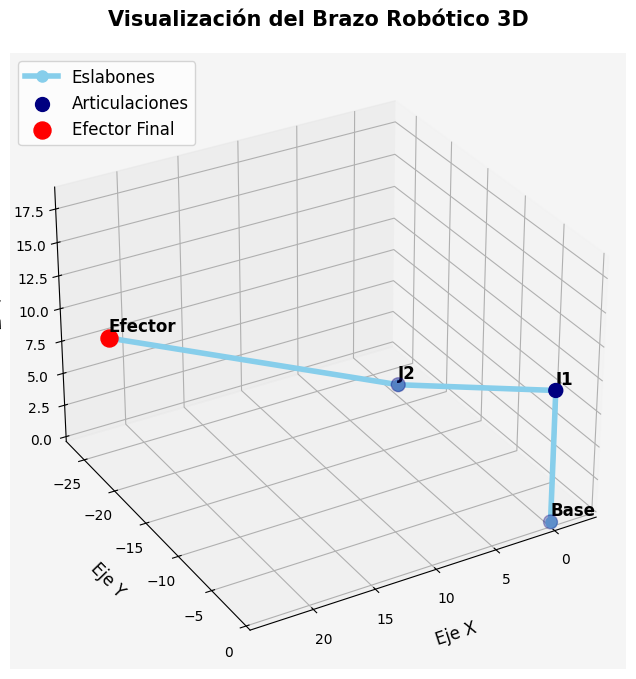

Combinación 3: q1 = 43.95°, q2 = 0.05°, q3 = 4.96°
Posiciones: (25.13316504133966, 24.23174506690447, 12.019108696003677)


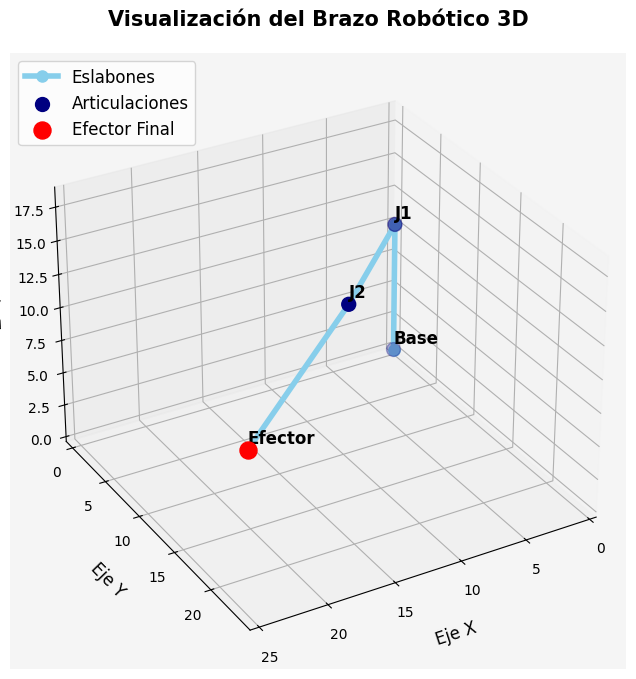

Combinación 4: q1 = 25.25°, q2 = -36.11°, q3 = 36.94°
Posiciones: (29.567794541138184, 13.947413760875307, 3.262566932775101)


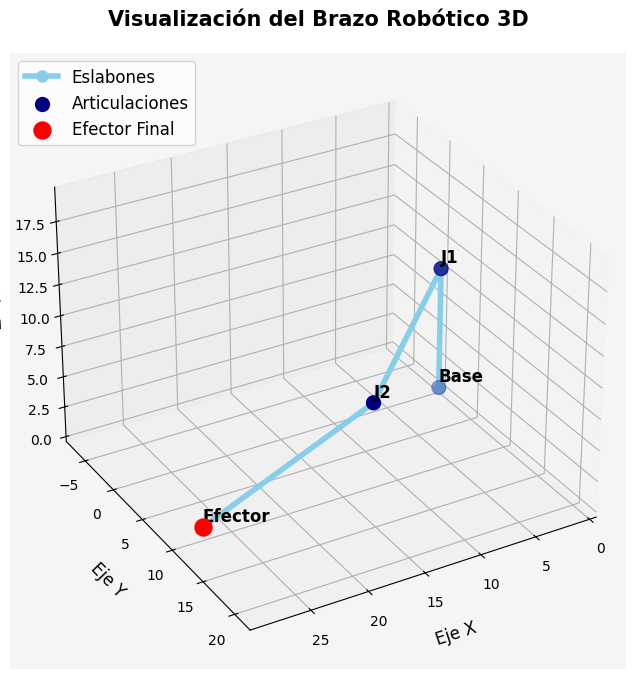

Combinación 5: q1 = -49.06°, q2 = 53.27°, q3 = 2.31°
Posiciones: (13.223567792755272, -15.242463886474136, 38.58944047841942)


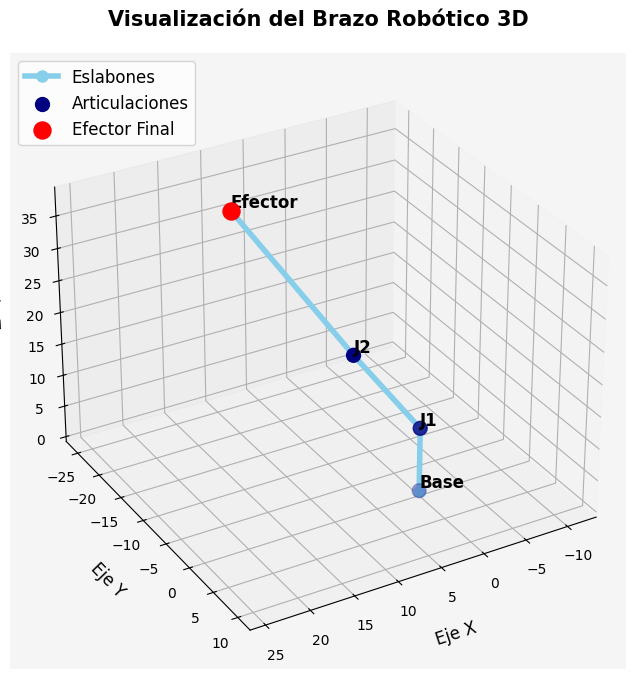

In [53]:
import random
random.seed(7777)
def generar_combinaciones():
    combinaciones = []
    posiciones = []
    posiciones1 = []
    for _ in range(5):
        q1 = random.uniform(-60, 60)
        q2 = random.uniform(-60, 60)
        q3 = random.uniform(-60, 60)
        pos = forward_kinematics(q1, q2, q3, 10, 12, 23)
        pos2 = pos[-1]
        combinaciones.append((q1, q2, q3))
        posiciones.append(pos2)
        posiciones1.append(pos)
    return combinaciones, posiciones, posiciones1

combinaciones, posiciones, posiciones1 = generar_combinaciones()
for i, (q1, q2, q3) in enumerate(combinaciones, start=1):
    print(f"Combinación {i}: q1 = {q1:.2f}°, q2 = {q2:.2f}°, q3 = {q3:.2f}°")
    print(f"Posiciones: {posiciones[i-1]}")
    plot_robot(posiciones1[i-1])
    

In [ ]:
#